In [1]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

!pip install bert-for-tf2
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

In [2]:
import os
import datetime
import re
import math
import nltk
import scipy
import string
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from scipy.stats import randint
from wordcloud import WordCloud
from multiprocessing import Pool
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from scipy.stats import loguniform
import gensim
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
!pip install scikit-plot

In [67]:
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score

from IPython.display import display

In [5]:
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Train.csv', header=0)
target = 'label'
df.reset_index(drop=True, inplace=True)
original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1



Inference: The Datset consists of 2 features & 40000 samples.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [8]:
display(df.describe())

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Data Preprocessing

In [9]:
#Checking for empty values
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [10]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True, inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 277


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import sent_tokenize

In [13]:
def process_sentence(sentence):
    '''Removes all special characters from sentence. It will also strip out
    extra whitespace and makes the string lowercase.
    '''
    return re.sub(r'[\\\\/:*«`\'?¿";!<>,.|]', '', sentence.lower().strip())

In [14]:
# def Preprocessing(text):
#     text = re.sub(r'[^\w\s\<\>]','',text)
#     text = text.lower()
#     text = [w for w in text.split(' ') if w not in stopwords.words('english')]
#     text = [WordNetLemmatizer().lemmatize(token) for token in text]
#     text = [WordNetLemmatizer().lemmatize(token,pos='v') for token in text]
#     text = " ".join(text)
#     return text

# df['text'] = df.text.apply(lambda x:Preprocessing(x))

In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

#Test
text = "this is the only solution of that question".split() 
remove_stopwords(text)

['solution', 'question']

In [17]:
#Filtering the text

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

In [19]:
imdb_df= df['text'].tolist()
data_words = list(sent_to_words(imdb_df))
print('data_words[:1]', data_words[:1])

data_words[:1] [['grew', 'up', 'watching', 'and', 'loving', 'the', 'thunderbirds', 'all', 'my', 'mates', 'at', 'school', 'watched', 'we', 'played', 'thunderbirds', 'before', 'school', 'during', 'lunch', 'and', 'after', 'school', 'we', 'all', 'wanted', 'to', 'be', 'virgil', 'or', 'scott', 'no', 'one', 'wanted', 'to', 'be', 'alan', 'counting', 'down', 'from', 'became', 'an', 'art', 'form', 'took', 'my', 'children', 'to', 'see', 'the', 'movie', 'hoping', 'they', 'would', 'get', 'glimpse', 'of', 'what', 'loved', 'as', 'child', 'how', 'bitterly', 'disappointing', 'the', 'only', 'high', 'point', 'was', 'the', 'snappy', 'theme', 'tune', 'not', 'that', 'it', 'could', 'compare', 'with', 'the', 'original', 'score', 'of', 'the', 'thunderbirds', 'thankfully', 'early', 'saturday', 'mornings', 'one', 'television', 'channel', 'still', 'plays', 'reruns', 'of', 'the', 'series', 'gerry', 'anderson', 'and', 'his', 'wife', 'created', 'jonatha', 'frakes', 'should', 'hand', 'in', 'his', 'directors', 'chair'

In [20]:
df['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [21]:
#Splitting Dataset

train_x = df['text']
train_y = df['label']

In [22]:
# #Splitting Dataset
# X = df.drop([target],axis=1)
# Y = df[target]
# Train_X, Test_X, Train_Y, Test_Y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

# print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Text(0.5, 0, 'Length')

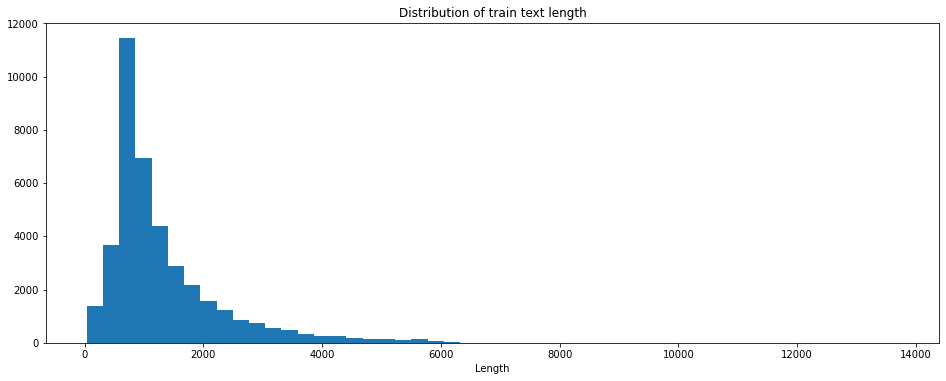

In [23]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
train_len = [len(l) for l in train_x]
plt.hist(train_len,bins=50)
plt.title('Distribution of train text length')
plt.xlabel('Length')

In [24]:
def getWordCloud(hashtags):
    
  # Read the whole text.
    text = ' '.join(hashtags)
  # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
  # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.pdf', dpi=500) 
    plt.show()

# WORDCLOUD FOR MOST COMMON POSITIVE AND NEGATIVE WORDS

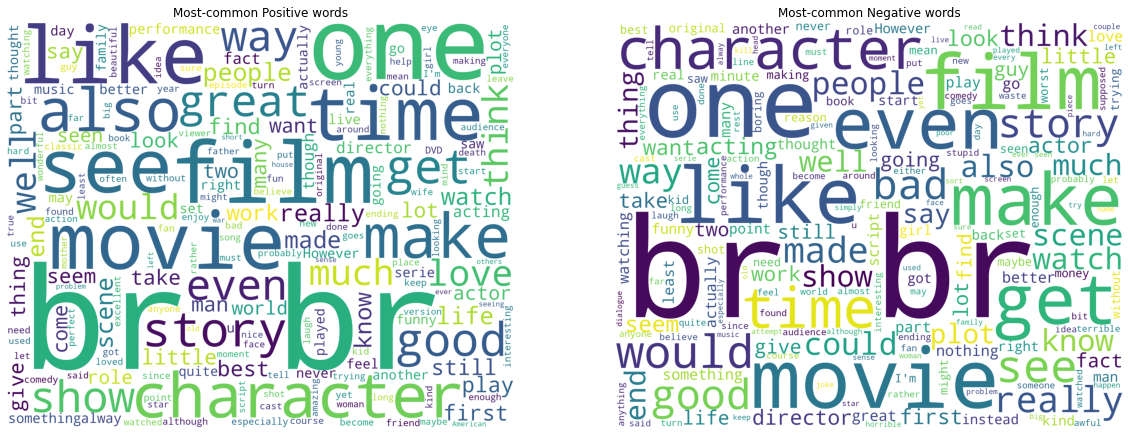

In [25]:
positivedata = df[df['label']== 1]
positivedata =positivedata['text']
negdata = df[df['label']== 0]
negdata= negdata['text']

def wordcloud_draw(data, color, s):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
    wordcloud = WordCloud(stopwords=stopwords.words('english'),background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.imshow(wordcloud)
    plt.title(s)
    plt.axis('off')

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
wordcloud_draw(positivedata,'white','Most-common Positive words')

plt.subplot(1,2,2)
wordcloud_draw(negdata, 'white','Most-common Negative words')
plt.show()

In [26]:
# plt.figure(figsize=(20,6))
# pos_freq.plot(50,cumulative=False,title='Positive Review Common Text',color = "green")
# plt.show()

In [27]:
# plt.figure(figsize=(20,6))
# neg_freq.plot(50,cumulative=False,title='Negative Review Common Text',color='red')
# plt.show()

# Preparing the Data

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
#Tokenize the sentences
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(train_x)

#converting text into integer sequences
train_x = tokenizer.texts_to_sequences(train_x)

In [31]:
#padding to prepare sequences of same length
train_x=pad_sequences(train_x,maxlen=120)

In [32]:
size_of_vocabulary = len(tokenizer.word_index)+1
print(size_of_vocabulary)

112204


# Modeling (Defining the Architecture)

In [33]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [34]:
model = Sequential()
#embedding layer
model.add(Embedding(size_of_vocabulary,128,input_length=120))

#lstm layer
model.add(Bidirectional(LSTM(64,return_sequences=True,dropout=0.2)))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1,activation='sigmoid'))

#Add loss function, metrics, optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Adding callbacks
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True,verbose=1)

#summarize
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          14362112  
                                                                 
 bidirectional (Bidirectiona  (None, 120, 128)         98816     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [35]:
history = model.fit(train_x, train_y,batch_size=16,shuffle=True,epochs=5,
                    validation_split=0.1,verbose=1,callbacks=[es,mc])

Epoch 1/5
2250/2250 [==============================] - ETA: 0s - loss: 0.3899 - accuracy: 0.8206
Epoch 00001: val_accuracy improved from -inf to 0.87600, saving model to best_model.h5
2250/2250 [==============================] - 599s 263ms/step - loss: 0.3899 - accuracy: 0.8206 - val_loss: 0.2941 - val_accuracy: 0.8760
Epoch 2/5
2250/2250 [==============================] - ETA: 0s - loss: 0.1928 - accuracy: 0.9261
Epoch 00002: val_accuracy improved from 0.87600 to 0.88050, saving model to best_model.h5
2250/2250 [==============================] - 695s 309ms/step - loss: 0.1928 - accuracy: 0.9261 - val_loss: 0.2944 - val_accuracy: 0.8805
Epoch 3/5
2250/2250 [==============================] - ETA: 0s - loss: 0.0907 - accuracy: 0.9686
Epoch 00003: val_accuracy did not improve from 0.88050
2250/2250 [==============================] - 535s 238ms/step - loss: 0.0907 - accuracy: 0.9686 - val_loss: 0.4187 - val_accuracy: 0.8580
Epoch 4/5
2250/2250 [==============================] - ETA: 0s - l

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1) 

In [ ]:
# history = model.fit(train_x,train_y,batch_size=128,epochs=100,verbose=1,callbacks=[es,mc])

# Evaluating the performance of the model

In [38]:
#loading best model
model = load_model('best_model.h5')
# evaluate
loss,acc = model.evaluate(train_x,train_y)
print('Test Accuracy: {}%'.format(acc*100))

1250/1250 [==============================] - 44s 34ms/step - loss: 0.0995 - accuracy: 0.9680
Test Accuracy: 96.79750204086304%


# Confusion Metrics

In [40]:
ypred = model.predict(train_x)
ypred[ypred>0.5]=1
ypred[ypred<=0.5]=0

#Confusion Metrics
print(confusion_matrix(train_y,ypred))

[[19397   622]
 [  659 19322]]


# Classification Report

In [41]:
print(classification_report(train_y,ypred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     20019
           1       0.97      0.97      0.97     19981

    accuracy                           0.97     40000
   macro avg       0.97      0.97      0.97     40000
weighted avg       0.97      0.97      0.97     40000



In [42]:
import nltk
import string
from tqdm import tqdm
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [43]:
df = df1.copy()

def preprocessor(text):
    text = text.lower()
    text = ''.join([i for i in text if i in string.ascii_lowercase+' '])
    text = ' '.join([PorterStemmer().stem(word) for word in text.split()])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

#with Pool(4) as p:
#    df['text'] = list(tqdm(p.imap(preprocessor, range(df.shape[0]))))
for i in tqdm(range(df.shape[0])):
    df.loc[i,'text'] = preprocessor(df['text'][i])


100%|██████████████████████████████████████████████████████████████████████████| 39723/39723 [1:30:19<00:00,  7.33it/s]


In [44]:
df.head()

,text,label
0,grew b watch love thunderbird mate school watc...,0
1,put thi movi dvd player sat coke chip expect w...,0
2,whi peopl know particular time past wa like fe...,0
3,even though great interest biblic movi wa bore...,0
4,im die hard dad armi fan noth ever chang got t...,1


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=df.label.values
x=tfidf.fit_transform(df.text)

            Target Variable Distribution           


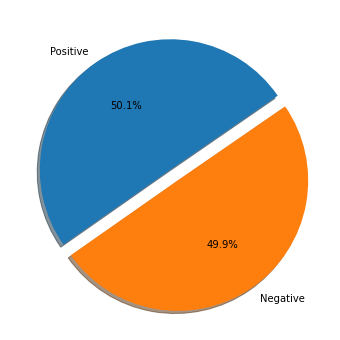

In [46]:
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df[target].value_counts(), labels=['Positive','Negative'], counterclock=False, shadow=True, 
        explode=[0,0.1], autopct='%1.1f%%', radius=1, startangle=215)
plt.show()

In [68]:
#Splitting the data intro training & testing sets

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (39723, 1) (39723,) 
Training set  --->  (31778, 119535) (31778,) 
Testing set   --->  (7945, 119535)  (7945,)


In [69]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((4,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0


In [70]:
#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

In [72]:
#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 89.1%
F1 Score = 89.0%

 Confusiton Matrix:
 [[3584  500]
 [ 367 3494]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      4084
           1       0.87      0.90      0.89      3861

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



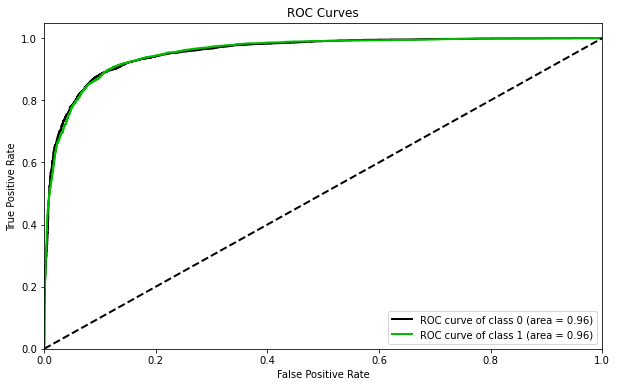

In [73]:
LR_model = LogisticRegression()
LR = LR_model.fit(Train_X, Train_Y)
pred = LR.predict(Test_X)
pred_prob = LR.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,0)

# Decision Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 70.8%
F1 Score = 70.0%

 Confusiton Matrix:
 [[2907 1177]
 [1146 2715]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      4084
           1       0.70      0.70      0.70      3861

    accuracy                           0.71      7945
   macro avg       0.71      0.71      0.71      7945
weighted avg       0.71      0.71      0.71      7945



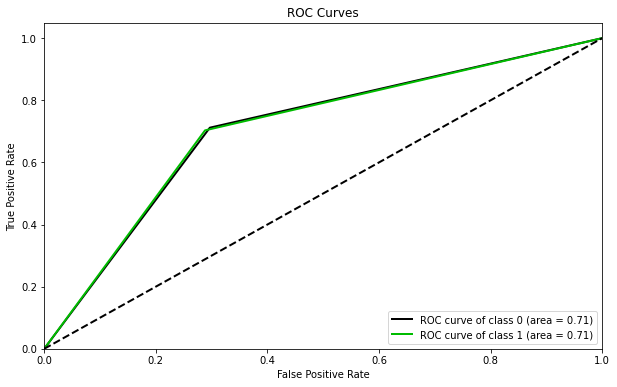

In [74]:
DT_model = DecisionTreeClassifier()
DT = DT_model.fit(Train_X, Train_Y)
pred = DT.predict(Test_X)
pred_prob = DT.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,1)

# Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 84.6%
F1 Score = 84.3%

 Confusiton Matrix:
 [[3438  646]
 [ 576 3285]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4084
           1       0.84      0.85      0.84      3861

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



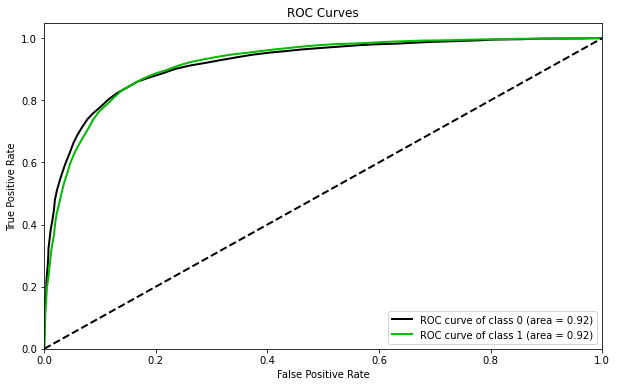

In [75]:
RandF_model = RandomForestClassifier()
RandF = RandF_model.fit(Train_X, Train_Y)
pred = RandF.predict(Test_X)
pred_prob = RandF.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,2)

# Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 84.5%
F1 Score = 83.6%

 Confusiton Matrix:
 [[3578  506]
 [ 723 3138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4084
           1       0.86      0.81      0.84      3861

    accuracy                           0.85      7945
   macro avg       0.85      0.84      0.84      7945
weighted avg       0.85      0.85      0.85      7945



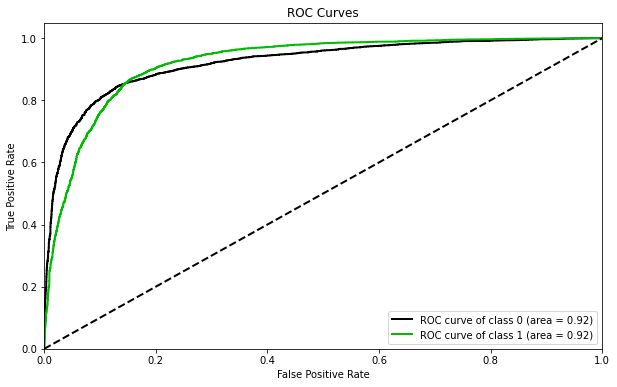

In [76]:
NB_model = BernoulliNB()
NB = NB_model.fit(Train_X, Train_Y)
pred = NB.predict(Test_X)
pred_prob = NB.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,3)

In [78]:
#Plotting Confusion-Matrix of all the predictive Models

labels=['Positive','Negative']
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')

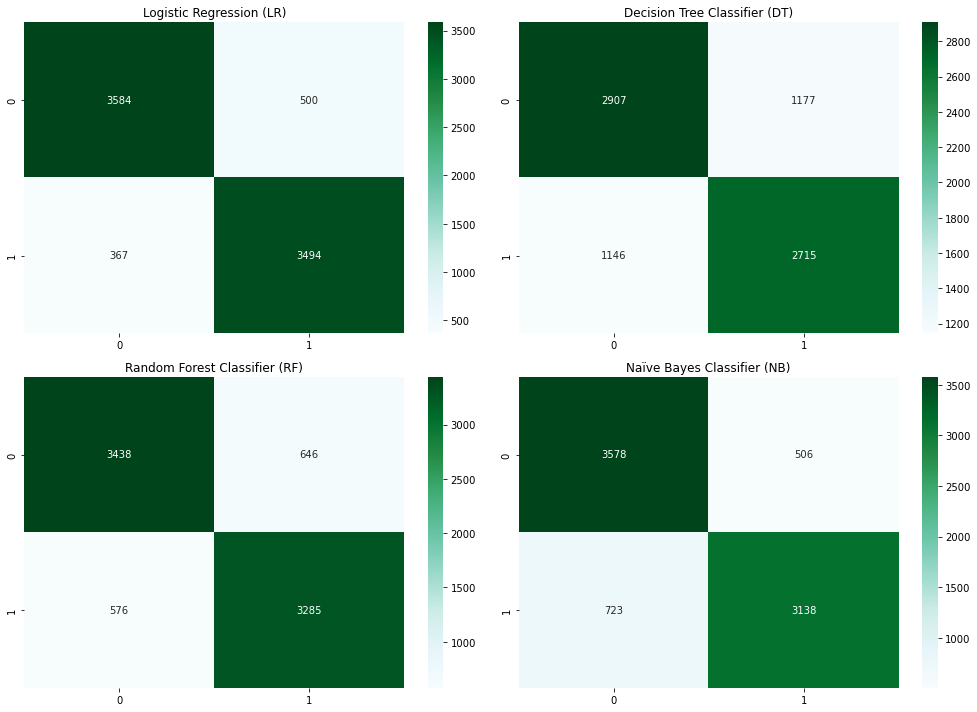

In [85]:
def conf_mat_plot(all_models):
    plt.figure(figsize=[14,5*math.ceil(len([all_models])*len(labels))])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,2,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/2),2,i+1)
        pred = all_models[i].predict(Test_X)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RandF,NB])

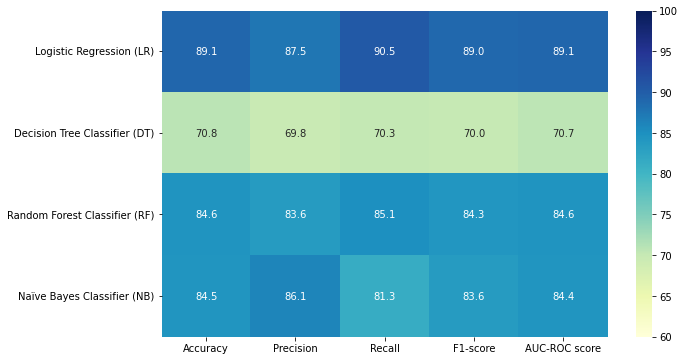

In [79]:
#Comparing all the models Scores
sns.heatmap(Evaluation_Results, annot=True, vmin=60, vmax=100.0, cmap='YlGnBu', fmt='.1f')
plt.show()